<a href="https://colab.research.google.com/github/syedabusafwan/ML-practice/blob/main/Exploratory_Data_Analysis_(EDA)_on_the_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Info

 The dataset includes information such as:

PassengerId: Unique ID for each passenger.

Survived: Survival (0 = No, 1 = Yes) - Target Variable.

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).

Name: Passenger name.

Sex: Passenger sex.

Age: Age in years.

SibSp: # of siblings/spouses aboard the Titanic.

Parch: # of parents/children aboard the Titanic.

Ticket: Ticket number.

Fare: Passenger fare.

Cabin: Cabin number.

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The dataset can be found here:

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

To download this data using terminal, run the following command:

!wget https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

# Data Load and Preview

In [27]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

--2026-01-15 05:37:33--  https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.4’

titanic.csv.4       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2026-01-15 05:37:33 (4.78 MB/s) - ‘titanic.csv.4’ saved [60302/60302]



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Loading the dataset
df = pd.read_csv("titanic.csv")

# Displaying first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Handling Missing Values

In [33]:
# Calculating percentage of missing values
age_mp = (df["Age"].isnull().sum() / len(df)) * 100
age_mp

np.float64(19.865319865319865)

In [34]:
cabin_mp = (df["Cabin"].isnull().sum() / len(df)) * 100
cabin_mp

np.float64(77.10437710437711)

**Cabin needs to be dropped**

In [35]:
df.drop(columns=["Cabin"], inplace=True)

In [36]:
# Finding the most frequent port (mode)
df["Embarked"].mode()


,Embarked
0,S


In [37]:
# Finding the most frequent port (mode)
df["Embarked"].mode()


,Embarked
0,S


In [38]:
# Finding the most frequent port (mode)
df["Embarked"].mode()


,Embarked
0,S


In [39]:
# Filling missing Embarked values with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [40]:
df['Age'].median()

28.0

In [41]:
# Filling missing Age values with median
df["Age"] = df["Age"].fillna(df["Age"].median())

In [42]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Univariate Analysis

In [43]:
# Calculating survival rate
survival_rate = df["Survived"].mean() * 100
survival_rate

np.float64(38.38383838383838)

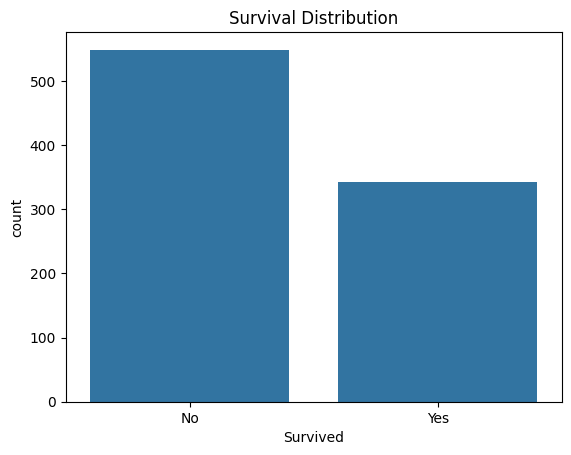

In [49]:
# Visualizing survival distribution
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

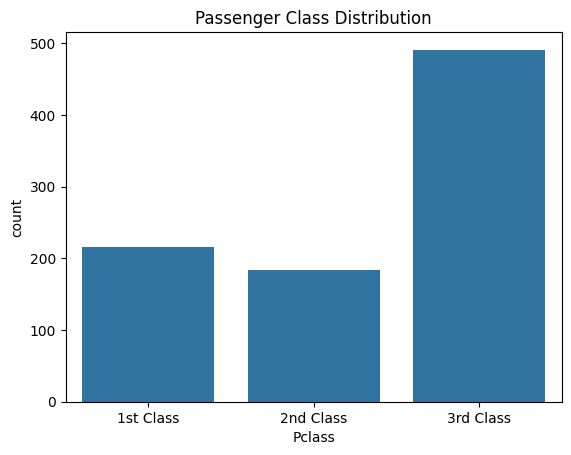

In [53]:
# Visualizing passenger class distribution
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

**3rd class** had the highest number of passengers.

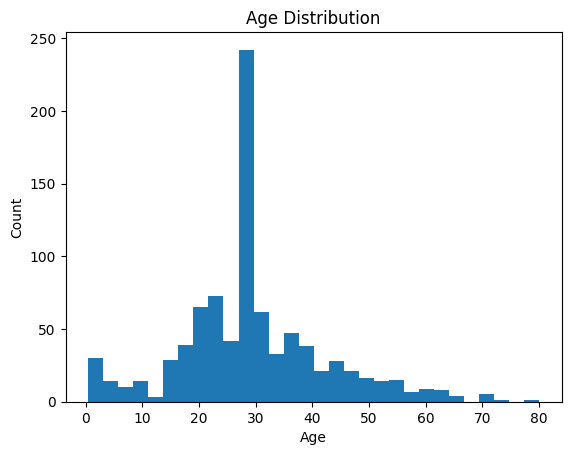

In [54]:
# Plotting age distribution
plt.hist(df["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


# Bivariate and Multivariate Analysis

In [55]:
# Crosstabulation
pd.crosstab(df["Sex"], df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


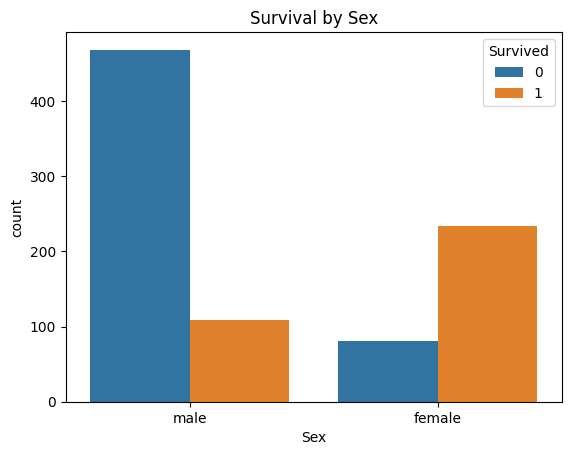

In [56]:
# Visualization
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

Question: Which gender had a significantly higher survival rate?
Ans: **Female**

In [57]:
# Survival rate by class
df.groupby("Pclass")["Survived"].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


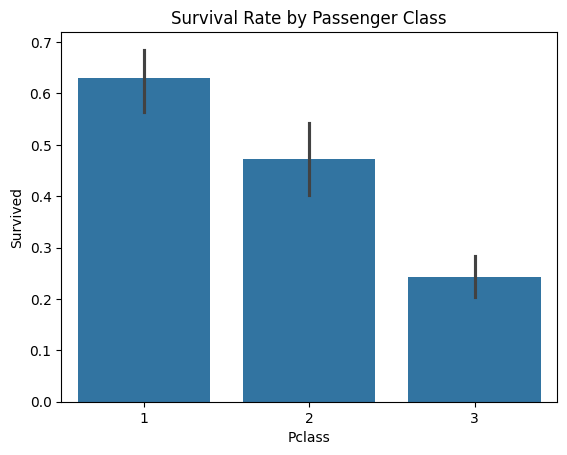

In [58]:
# Visualization
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

Question: Is there a clear correlation between ticket class and survival probability?
Ans: **Higher Class ticket** have more survibal possibility

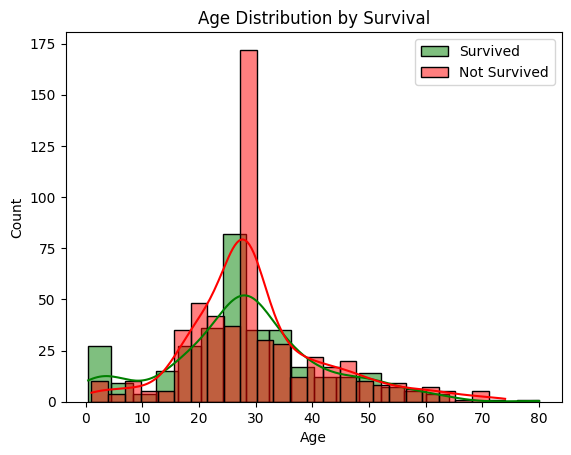

In [59]:
# Comparing age distributions
sns.histplot(df[df["Survived"] == 1]["Age"], color="green", label="Survived", kde=True)
sns.histplot(df[df["Survived"] == 0]["Age"], color="red", label="Not Survived", kde=True)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

Observation: What does the plot suggest about the survival chances of children and the elderly?
**Children's** with higher survival rate

In [61]:
# Survival rate by Embarked
df.groupby("Embarked")["Survived"].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


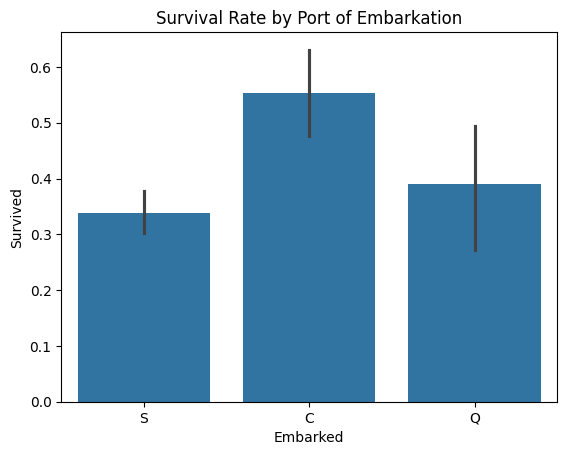

In [62]:
# Visualization
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

# Conclusion and Insights

Exploratory data analysis on the Titanic data uncovers that survival is most influenced by **Gender, Class, and Age**. The chances of survival were much higher for **females** than for male survivors. Those traveling in **higher classes** (particularly in 1st class) have a much greater opportunity for survival than those in 3rd class. In addition, **children** have a greater opportunity for survival than older people. Overall, we may state that **Sex, Pclass, and Age** are apparently the most important factors that determine survival in Titanic.